In [593]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf

In [594]:
IMG_SIZE  = 32
 

# load data 

In [595]:
imges_path = Path("data/images").resolve()
label_path = Path("data/labels").resolve()
img_path = imges_path.glob("*.png")
label_path = label_path.glob("*.json")
# example y {"class": 1, "coord": [[0.46875, 0.09375, 0.171875, 0.34375]]}
X = []
Y = []
grey = (109, 108, 111)
light_grey = (146, 145, 149)
# get one random image
for img, label in zip(img_path, label_path):
    
    sample= cv2.imread(str(img))
    # resize imag"
    img_r = cv2.imread(str(img))
    img_r = cv2.resize(img_r, (IMG_SIZE, IMG_SIZE))
# use morphological gradient to get edges

    #mask = cv2.inRange(img_r,grey, light_grey)
    #reslut = cv2.bitwise_and(img_r, img_r, mask=mask)
    X.append(img_r)
    
    y_merged = list(pd.read_json(label)['class'])
    y_merged.extend(pd.read_json(label)['coord'].values[0])
    Y.append(y_merged)
X = np.array(X)
Y = np.array(Y)
print(Y.shape)

(458, 5)


In [596]:
Y

array([[1.        , 0.53125   , 0.11328125, 0.22265625, 0.4453125 ],
       [1.        , 0.6015625 , 0.4765625 , 0.22265625, 0.4453125 ],
       [1.        , 0.12109375, 0.4921875 , 0.22265625, 0.4453125 ],
       ...,
       [1.        , 0.07421875, 0.25      , 0.22265625, 0.4453125 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.109375  , 0.41015625, 0.22265625, 0.4453125 ]])

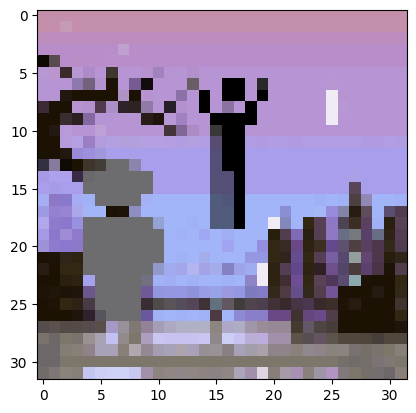

In [597]:
#sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
sample = cv2.resize(sample,(IMG_SIZE, IMG_SIZE))
plt.imshow(sample)

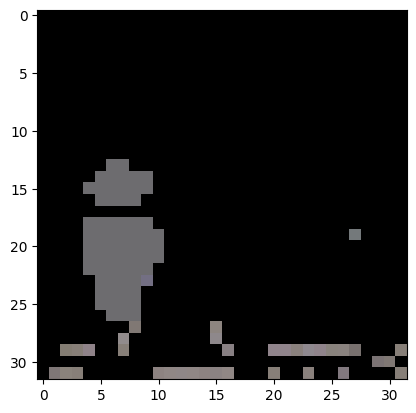

In [598]:
# use erosion to remove noise
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(sample,kernel,iterations = 1)
plt.imshow(erosion)
grey = (109, 108, 111)
light_grey = (146, 145, 149)
# use morphological gradient to get edges

mask = cv2.inRange(sample,grey, light_grey)


reslut = cv2.bitwise_and(sample, sample, mask=mask)
plt.imshow(reslut)

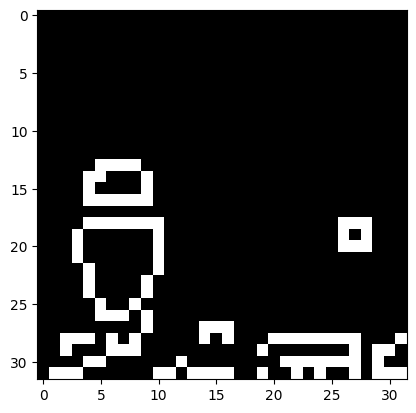

In [599]:

# use cannie filter to detect edges
filtered = cv2.Canny(reslut, 100, 200)
filtered.resize((IMG_SIZE, IMG_SIZE))
filtered = np.array(filtered)
plt.imshow(filtered, cmap="gray")

*we added black players just to make task harder for model*

## prepare data
1. resizes images to SIZExSIZE
2. normalizes images to [0,1]

In [600]:
X = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X] 
# greyscale
#X = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X]
X = np.array(X)
# normalize
#X = X / 255.0


print(X.shape, Y.shape)

(458, 32, 32, 3) (458, 5)


[0.0625     0.4375     0.22265625 0.4453125 ]
[0.671875   0.0625     0.22265625 0.4453125 ]
[0.09375    0.08984375 0.26171875 0.5234375 ]
[0.28515625 0.1875     0.26171875 0.5234375 ]
[0.00390625 0.3984375  0.22265625 0.4453125 ]
[0. 0. 0. 0.]


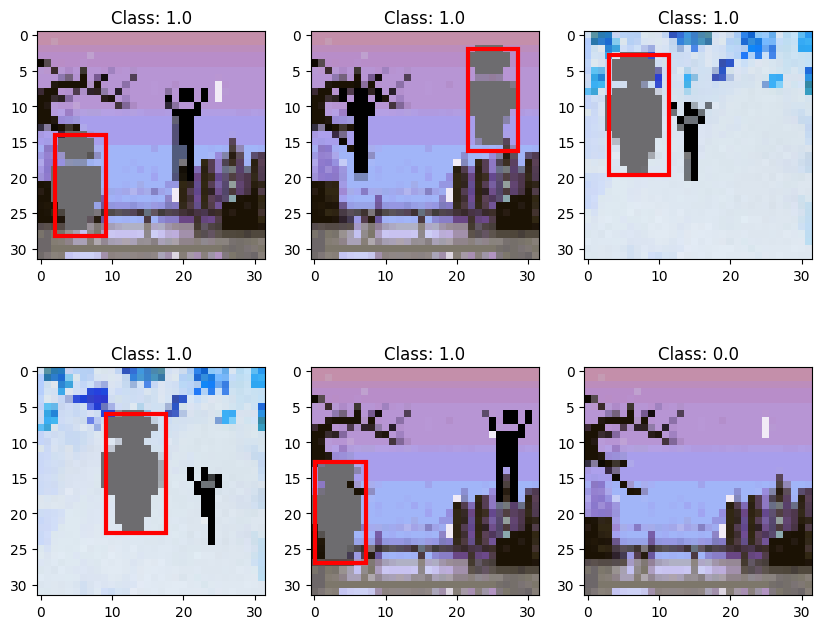

In [601]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X.shape[0], 6)

for i in range(2):
    for j in range(3):
        rect = Y[images[i * 3 + j]][1:]
        label = Y[images[i * 3 + j]][0]
        print(rect)
        x, y, w, h = rect
        ax[i, j].add_patch(
            plt.Rectangle(
                (x * IMG_SIZE, y * IMG_SIZE),
                w * IMG_SIZE,
                h * IMG_SIZE,
                fill=False,
                edgecolor="red",
                lw=3,
            )
        )
        ax[i,j].set_title(f"Class: {label}")
        ax[i, j].imshow(X[images[i * 3 + j]], cmap="gray")

plt.show()


In [602]:
# split data into train and test
#X = X.reshape(X.shape[0], IMG_SIZE, IMG_SIZE ,1)

# Y = Y.reshape(Y.shape[0],4, 2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape,  X_test.shape, y_train.shape, y_test.shape)


(366, 32, 32, 3) (92, 32, 32, 3) (366, 5) (92, 5)


In [603]:
y_train[0]

array([0., 0., 0., 0., 0.])

In [604]:
path = Path("data").resolve()
np.save(path / "X_train.npy", X_train)
np.save(path / "X_test.npy", X_test)
np.save(path / "y_train.npy", y_train)
np.save(path / "y_test.npy", y_test)
